In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import math

In [5]:
df = pd.read_csv('insurance_data2.csv')

In [6]:
df.head()

,age_new,Insured_1,Insured_2,Insured_3,Insured_Best
0,69,1,0,1,1
1,73,1,0,1,1
2,33,0,0,0,0
3,10,0,1,0,0
4,73,1,0,1,1


In [7]:
df1 = df[['age_new', 'Insured_1']]
df1.head()

,age_new,Insured_1
0,69,1
1,73,1
2,33,0
3,10,0
4,73,1


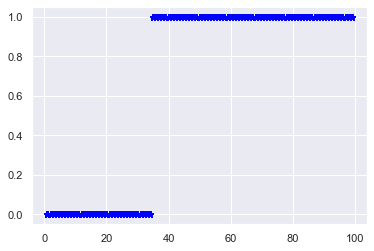

In [8]:
plt.scatter(df1.age_new,df.Insured_1, marker='*', color='blue')

## **Logistic Regression Model**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1[['age_new']],df1.Insured_1,test_size=0.2)

In [10]:
# Build Linear Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.score(X_test, y_test)

1.0

In [13]:
coeff_ = model.coef_
inter_ = model.intercept_
coeff_ = coeff_[0][0]
inter_ = inter_[0]
print(coeff_, '\n', inter_)

5.252553648697934 
 -181.17898026401807


(-2.0, 2.0)

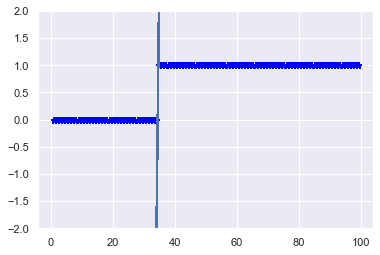

In [14]:
plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.age_new * coeff_ + inter_  )
plt.ylim(bottom=-2, top=2)

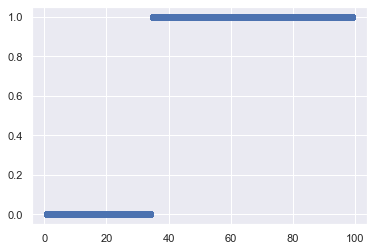

In [15]:
plt.scatter(X_test, model.predict(X_test))

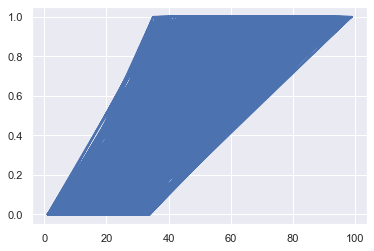

In [16]:
plt.plot(X_test, model.predict(X_test))

In [17]:
def sigmoid(x,coeff,intercept):
    res = coeff * x + intercept
    res = 1/(1+math.exp(-res))
    return res

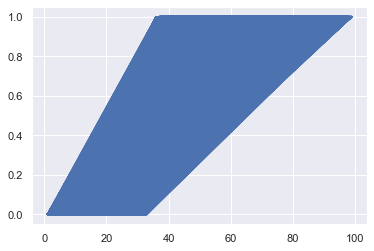

In [18]:
#plt.scatter(df1.age_new, df1.Insured_1, marker='*', color='blue')
plt.plot(df1.age_new,    df1.age_new.apply(sigmoid, coeff=coeff_, intercept=inter_))

In [19]:
def sigmoid2(x):
  return 1/(1+math.exp(-x))

In [20]:
ddtest        = pd.DataFrame()
ddtest['age'] = X_test['age_new'].sort_values()
ddtest['sigmoid'] = ddtest['age'].apply(sigmoid2)
ddtest.head()

,age,sigmoid
7635,1,0.731059
3726,1,0.731059
1043,1,0.731059
5857,1,0.731059
1683,1,0.731059


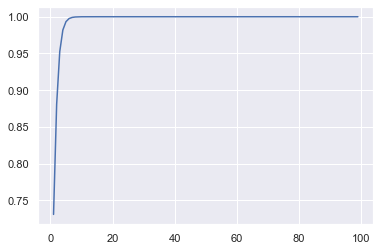

In [21]:
plt.plot(ddtest.age, ddtest.sigmoid)

In [23]:
ddtest2 = pd.DataFrame()
ddtest2['age'] = df1.age_new.sort_values()
ddtest2['sigmoid'] = ddtest2['age'].apply(sigmoid, coeff=coeff_, intercept = inter_)
ddtest2.head()

,age,sigmoid
8259,1,3.945697e-77
3627,1,3.945697e-77
2551,1,3.945697e-77
5046,1,3.945697e-77
4205,1,3.945697e-77


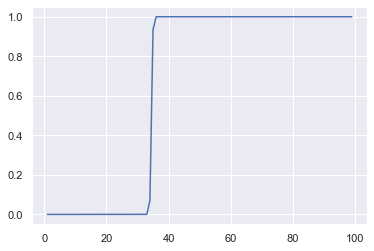

In [24]:
plt.plot(ddtest2.age, ddtest2.sigmoid)

In [26]:
ddtest3            = pd.DataFrame()
ddtest3['age']    = X_test['age_new'].sort_values()
ddtest3['sigmoid'] = ddtest3['age'].apply(sigmoid, coeff=coeff_, intercept = inter_)
ddtest3.head()

,age,sigmoid
7635,1,3.945697e-77
3726,1,3.945697e-77
1043,1,3.945697e-77
5857,1,3.945697e-77
1683,1,3.945697e-77


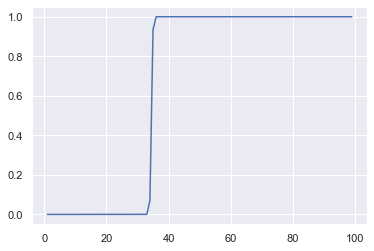

In [27]:
plt.plot(ddtest3.age, ddtest3.sigmoid)

In [50]:
ddtest['pred_prob'] = model.predict_proba(ddtest[['age']])[:, 1]

In [51]:
ddtest.head()

,age,sigmoid,pred_prob
7997,97,1.000000,1.000000e+00
2189,77,1.000000,1.000000e+00
4125,79,1.000000,1.000000e+00
9084,6,0.997527,1.111042e-64
9824,23,1.000000,1.639263e-26


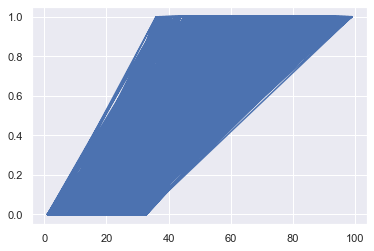

In [52]:
plt.plot(ddtest.age, ddtest.pred_prob)